In [1]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (111 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-2) ...
Selecting previously unselected package openslide-tools.
Preparing to unpack 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
import random
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
def make_dir(base_path, level):
    level_dir = f'{base_path}level{level}'
    if not os.path.exists(level_dir):
        os.mkdir(level_dir)
    train_image_dir = os.path.join(level_dir,'train_image/')
    train_mask_dir = os.path.join(level_dir,'train_mask/')

    val_image_dir = os.path.join(level_dir,'val_image/')
    val_mask_dir = os.path.join(level_dir,'val_mask/')

    test_image_dir = os.path.join(level_dir,'test_image/')
    test_mask_dir = os.path.join(level_dir,'test_mask/')

    if not os.path.exists(train_image_dir):
        os.mkdir(train_image_dir)
    if not os.path.exists(train_mask_dir):
        os.mkdir(train_mask_dir)
    if not os.path.exists(val_image_dir):
        os.mkdir(val_image_dir)
    if not os.path.exists(val_mask_dir):
        os.mkdir(val_mask_dir)    
    if not os.path.exists(test_image_dir):
        os.mkdir(test_image_dir)
    if not os.path.exists(test_mask_dir):
        os.mkdir(test_mask_dir)
    return(train_image_dir, train_mask_dir, val_image_dir, val_mask_dir, test_image_dir, test_mask_dir)

In [100]:
base_path = '/content/'
train_image_dir5, train_mask_dir5, val_image_dir5, val_mask_dir5, test_image_dir5, test_mask_dir5 = make_dir(base_path, level = 5)
train_image_dir4, train_mask_dir4, val_image_dir4, val_mask_dir4, test_image_dir4, test_mask_dir4 = make_dir(base_path, level = 4)
train_image_dir3, train_mask_dir3, val_image_dir3, val_mask_dir3, test_image_dir3, test_mask_dir3 = make_dir(base_path, level = 3)

In [101]:
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/train_mask.zip' -d /content/level5/train_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/train_image.zip' -d /content/level5/train_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/val_mask.zip' -d /content/level5/val_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/val_image.zip' -d /content/level5/val_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/test_mask.zip' -d /content/level5/test_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level5/test_image.zip' -d /content/level5/test_image/

!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/train_mask.zip' -d /content/level4/train_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/train_image.zip' -d /content/level4/train_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/val_mask.zip' -d /content/level4/val_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/val_image.zip' -d /content/level4/val_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/test_mask.zip' -d /content/level4/test_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/test_image.zip' -d /content/level4/test_image/

!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/train_mask.zip' -d /content/level3/train_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/train_image.zip' -d /content/level3/train_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/val_mask.zip' -d /content/level3/val_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/val_image.zip' -d /content/level3/val_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/test_mask.zip' -d /content/level3/test_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level3/test_image.zip' -d /content/level3/test_image/

replace /content/level5/train_mask/tumor/slide078_train_mask_tumor_382.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/level5/train_mask/tumor/slide035_train_mask_tumor_1218.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/level5/train_mask/tumor/slide078_train_mask_tumor_546.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/level5/train_mask/tumor/slide078_train_mask_tumor_304.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace /content/level5/train_image/tumor/slide078_train_image_tumor_330.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace /content/level5/val_mask/tumor/slide094_val_mask_tumor_383.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace /content/level5/val_image/tumor/slide094_val_image_tumor_375.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace /content/level5/test_mask/tumor/slide016_test_mask_tumor_49.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace /content/level5/test_image/tumor/slide031_test_image_tumor_91.

In [102]:
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level5/level5_train_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level5/level5_val_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level5/level5_test_data.txt' /content/

!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_train_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_val_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_test_data.txt' /content/

!cp '/content/drive/MyDrive/Applied Deep Learning/project/level3/level3_train_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level3/level3_val_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level3/level3_test_data.txt' /content/

# Display random-picked normal patches and tumor patches from train data at level 5

In [172]:
normal_patches_list = os.listdir('/content/level5/train_image/normal/')
tumor_patches_list = os.listdir('/content/level5/train_image/tumor/')
random.seed(12)
random_normal_patches = random.sample(normal_patches_list,4)
random_tumor_patches = random.sample(tumor_patches_list,4)

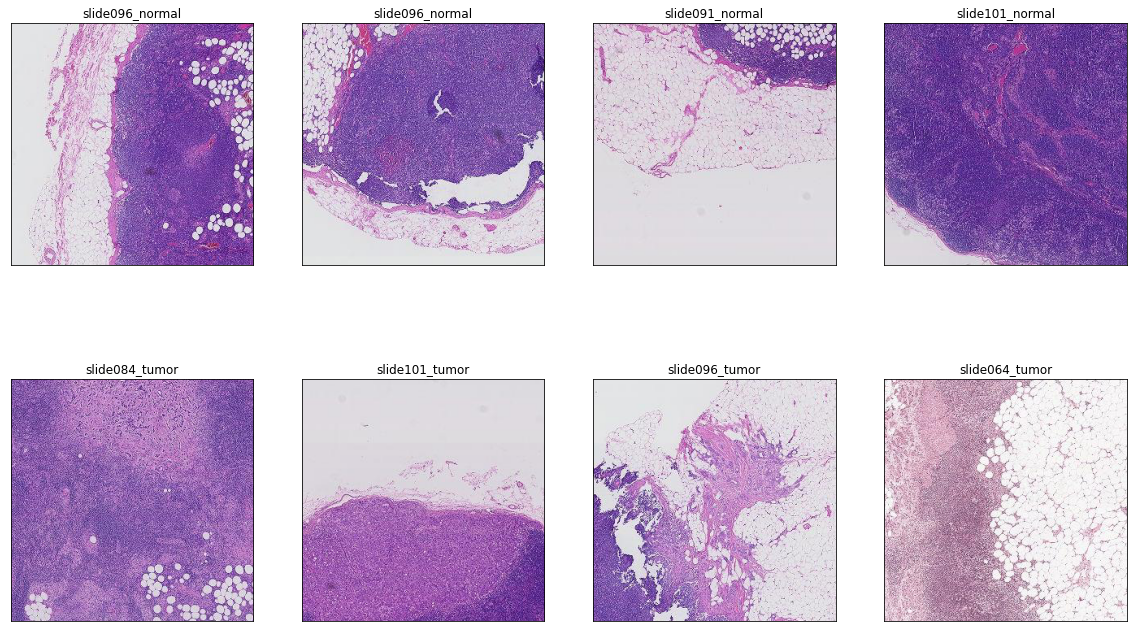

In [174]:
random_patches = [random_normal_patches,random_tumor_patches]
dim_axis = [2, 4]
fig = plt.figure(figsize=(20,12))
for i in range(dim_axis[0]):
    for j in range(dim_axis[1]):
        ax = fig.add_subplot(dim_axis[0], dim_axis[1], i*dim_axis[1]+j+1)
        img = None
        if i == 0:
          img = plt.imread(os.path.join('/content/level5/train_image/normal/', random_patches[i][j]))
          mask = plt.imread(os.path.join('/content/level5/train_mask/normal/', random_patches[i][j].replace('image','mask')))
          plt.imshow(img)
          # plt.imshow(mask,cmap='jet',alpha=0.3)
          plt.title(random_patches[i][j])
          plt.title(random_patches[i][j].split('_')[0]+'_normal')
        else:
          img = plt.imread(os.path.join('/content/level5/train_image/tumor/', random_patches[i][j]))
          mask = plt.imread(os.path.join('/content/level5/train_mask/tumor/', random_patches[i][j].replace('image','mask')))
          plt.imshow(img)
          # plt.imshow(mask,cmap='jet',alpha=0.3)
          plt.title(random_patches[i][j].split('_')[0]+'_tumor')
        im_gray = rgb2gray(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

plt.savefig("random_patches.png")

# Display patches at different level (3,4,5)

In [ ]:
df5 = pd.read_csv('/content/level5_train_data.txt', header=None)
df5.columns = ['Image Paths', 'Mask Paths', 'Xoffset', 'Yoffset', 'Labels', 'Slide Code', 'Level']

df4 = pd.read_csv('/content/level4_train_data.txt', header=None)
df4.columns = ['Image Paths', 'Mask Paths', 'Xoffset', 'Yoffset', 'Labels', 'Slide Code', 'Level']

df3 = pd.read_csv('/content/level3_train_data.txt', header=None)
df3.columns = ['Image Paths', 'Mask Paths', 'Xoffset', 'Yoffset', 'Labels', 'Slide Code', 'Level']

In [154]:
slide_code = '081'
x = 39936
y = 39936

img_path5 = '/content/level5/train_image/normal/slide081_train_image_normal_90.jpeg'
img_path4 = '/content/level4/train_image/normal/slide081_train_image_normal_294.jpeg'
img_path3 = '/content/level3/train_image/tumor/slide081_train_image_tumor_1058.jpeg'

mask_path5 = '/content/level5/train_mask/normal/slide081_train_mask_normal_90.jpeg'
mask_path4 = '/content/level4/train_mask/normal/slide081_train_mask_normal_294.jpeg'
mask_path3 = '/content/level3/train_mask/tumor/slide081_train_mask_tumor_1058.jpeg'

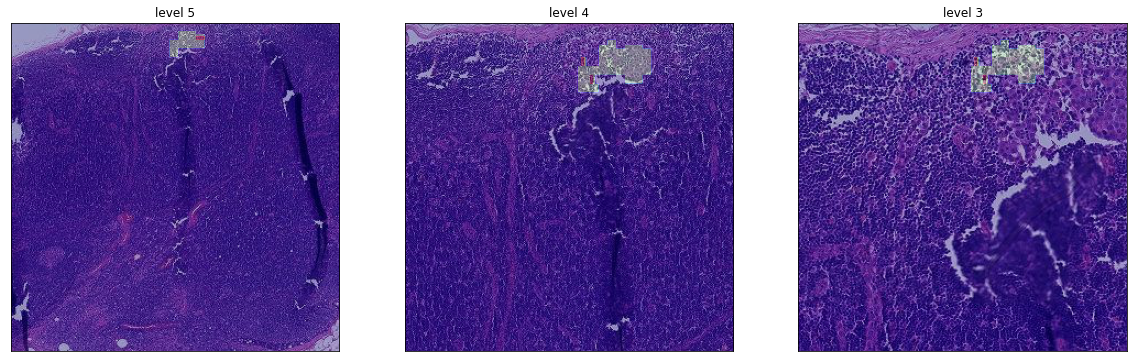

In [159]:
random_patches = [random_normal_patches,random_tumor_patches]
dim_axis = [1, 3]
fig = plt.figure(figsize=(20,12))
for i in range(dim_axis[0]):
    for j in range(dim_axis[1]):
        ax = fig.add_subplot(dim_axis[0], dim_axis[1], i*dim_axis[0]+j+1)
        img = None
        if j == 0:
          img = plt.imread(img_path5)
          mask = plt.imread(mask_path5)
          plt.imshow(img)
          plt.imshow(mask, cmap='jet', alpha=0.3)
          plt.title('level 5')
        elif j == 1:
          img = plt.imread(img_path4)
          mask = plt.imread(mask_path4)
          plt.imshow(img)
          plt.imshow(mask, cmap='jet', alpha=0.3)
          plt.title('level 4')
        else:
          img = plt.imread(img_path3)
          mask = plt.imread(mask_path4)
          plt.imshow(img)
          plt.imshow(mask, cmap='jet', alpha=0.3)
          plt.title('level 3')
        im_gray = rgb2gray(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

plt.savefig("patches_different_level.png")